# ***Домашняя работа №2***
## Терешин Кирилл Александрович 
### бфбо-03-24

## ***2.3.1. Загрузка данных и первичный осмотр***

### ***Задание 1***
>Импортировать необходимые библиотеки:
>- pandas (обязательно),
>- при необходимости numpy,
>- matplotlib.pyplot для визуализации.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### ***Задание 2***
>Загрузить учебный датасет в pandas.DataFrame с помощью pd.read_csv (или другого подходящего метода).

In [2]:
url = "/Users/kirill/Downloads/S02-hw-dataset.csv"
data = pd.read_csv(url, sep=",")

### ***Задание 3***
>Вывести:
>- первые строки датасета (head()),
> - информацию о столбцах и типах (info()),
> - базовые описательные статистики (describe() или аналог).

In [3]:
data.head() # первые строки

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [4]:
data.info() # информация о столбцах и типах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [5]:
data.describe() # описательные статистики

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


## ***2.3.2. Пропуски, дубликаты и базовый контроль качества***

### ***Задание 1***
>Посчитать долю пропусков в каждом столбце (например, через isna().mean() или аналог).

In [6]:
data.isna().mean() # доля пропусков в каждом столбце

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

### ***Задание 2***
>Проверить наличие полностью дублирующих строк (через duplicated()).

In [7]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

### ***Задание 3***
>Найти и вывести «подозрительные» случаи, исходя из смысла датасета.
>Примеры:
>- отрицательные значения в полях, где их не должно быть (количество, цена и т.п.);
>- нереалистичные значения (например, возраст > 100, нулевой доход при ненулевых количествах и т.п.);
>- другие логические противоречия, характерные для конкретного датасета.


In [8]:
otr_zn = data["purchases"] < 0 # исходя из описательных статистик, мы нашли отрицательные значения в столбце purchases
print(otr_zn) # проверяем строку и впоследствии выводим
print(f"отрицательное значение в столбце purchases = {data['purchases'][5]}")

print('=' * 20)

for x in range(len(data)):
    if data['age'][x] < 18 or data['age'][x] > 100:
        print(f"нереалистичный возраст в столбце age = {data['age'][x]}") # вывод нереалистичного возраста

print('=' * 20)

for x in range(len(data)):
    if data['revenue'][x] < data['purchases'][x]:
        print(f"нереалистичный доход в столбце revenue = {data['revenue'][x]}") # вывод нереалистичного дохода

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
Name: purchases, dtype: bool
отрицательное значение в столбце purchases = -1
нереалистичный возраст в столбце age = 120.0
нереалистичный возраст в столбце age = 5.0
нереалистичный доход в столбце revenue = 0


### ***Задание 4***
>Кратко (1-2 абзаца) описать текстом, какие проблемы качества данных были обнаружены.

Обнаружены **пропуски** в столбце **age**, их доля пропусков в каждом столбце равна 0,04878. Далее были обнаружены **дублирующиеся строчки**,а именно строка **№40**. После проведения базового контроля качества были обнаружены: **отрицательное значение в столбце purchases**, **нереалистичный возраст в столбце age**, **нереалистичный доход в столбце revenue**.

## ***2.3.3. Базовый EDA: группировки, агрегаты и частоты***

### ***Задание 1***
>Посчитать частоты для одной или двух категориальных переменных (например, value_counts() для столбца с категорией/страной/классом).

In [9]:
data['country'].value_counts() # частота категориальной переменной country

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

### ***Задание 2***
>Выполнить хотя бы одну осмысленную группировку с агрегатами через groupby:
>- например, среднее и сумму по количественным признакам в разрезе категорий.

In [10]:
group = data.groupby('country') # группировка по странам и последуюшйи вывод среднего значения
group.mean()

,user_id,age,purchases,revenue
country,,,,
CN,10.000000,24.000000,4.500000,1054.000000
DE,24.666667,34.600000,6.500000,1445.500000
FR,20.666667,46.250000,4.250000,675.916667
RU,18.076923,30.076923,4.769231,790.076923
US,22.375000,36.714286,4.625000,557.375000


### ***Задание 3***
>При необходимости ввести дополнительные «коридоры» (bins) или группировки (например, возрастные группы, диапазоны значений и т.п.).

In [11]:
bin_age = pd.cut(data['age'], bins=3, labels=['Молодой', 'Средний', 'Взрослый']) # ввели "коридоры" для возраста и вывели количество молодых средних и взрослых возрастов
print(bin_age.value_counts())

age
Молодой     28
Средний     10
Взрослый     1
Name: count, dtype: int64


### ***Задание 4***
>Кратко (1-2 абзаца) описать текстом основные наблюдения:
>- какие категории доминируют,
>- как отличаются группы по средним значениям,
>- есть ли неожиданные эффекты.


В категории страны у нас доминируют такие группы как RU и FR. Самый высокий средний возраст у FR, ср. доход у DE, ср. покупки у DE. Неожиданные эффекты - возраст китайцев и их соотношение зарплат с покупками.

## ***2.4. Визуализация данных в Matplotlib***

### ***Задание 1***
>Одну гистограмму для количественного признака:
>- осмысленный выбор числа корзин (bins),
>- подписи осей и заголовок.

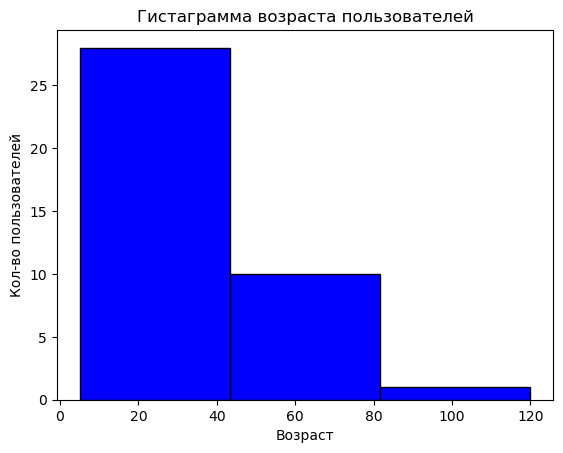

In [12]:
import numpy as np #
import matplotlib.pyplot as plt #

plt.hist(data['age'], bins = 3, color = 'blue', edgecolor = 'black') # параметры нашей гистаграмы

# подписи осей

plt.xlabel('Возраст')
plt.ylabel('Кол-во пользователей')
plt.title('Гистаграмма возраста пользователей')

plt.show()

### ***Задание 2***

>Один боксплот (boxplot) для количественного признака:
>- можно как общий, так и по группам (например, по категориям), подписи оси и заголовок.


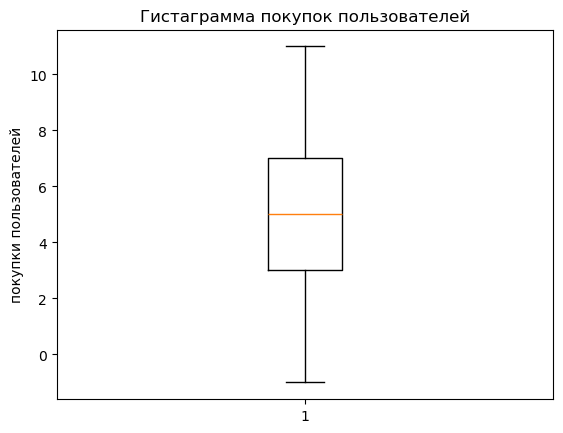

In [14]:
import numpy as np #
import matplotlib.pyplot as plt #

plt.boxplot(data['purchases']) # параметры нашей гистаграмы

# подписи осей
plt.ylabel('покупки пользователей')
plt.title('Гистаграмма покупок пользователей')

plt.show()

### ***Задание 3***

>Один scatter plot (диаграмма рассеяния) для пары количественных признаков:
>- подписи обеих осей,
>- заголовок,
>- при желании можно добавить цвет/легенду для различения категорий

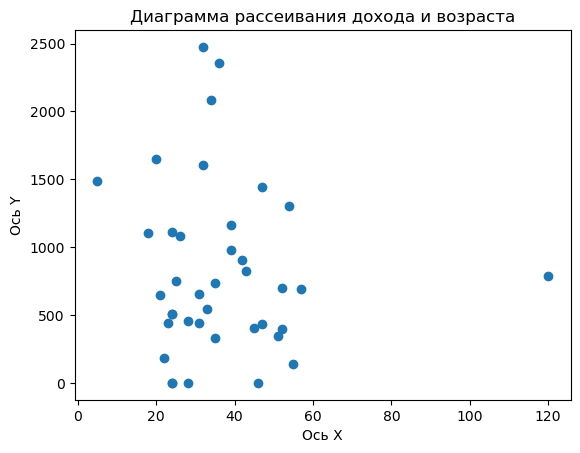

In [28]:
import numpy as np #
import matplotlib.pyplot as plt #

plt.scatter(data['age'],data['revenue']) # параметры нашей гистаграмы

# подписи осей
plt.xlabel("Ось X")
plt.ylabel("Ось Y")
plt.title("Диаграмма рассеивания дохода и возраста")

plt.show()

### ***Задание 4***

>Сохранить минимум один из построенных графиков в папку homeworks/HW02/figures/:
>- использовать plt.savefig(...) или аналог;
>- убедиться, что файл действительно появляется в репозитории и может быть открыт отдельно от ноутбука.

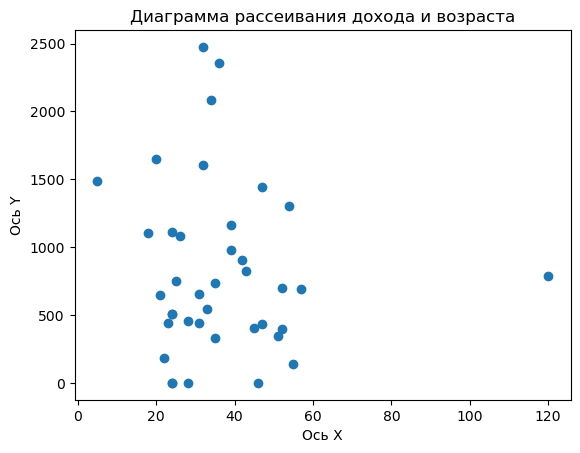

In [31]:
import numpy as np #
import matplotlib.pyplot as plt #

plt.scatter(data['age'],data['revenue']) # параметры нашей гистаграмы

# подписи осей
plt.xlabel("Ось X")
plt.ylabel("Ось Y")
plt.title("Диаграмма рассеивания дохода и возраста")

plt.savefig('figure1')
plt.show()